In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

sns.set_style("darkgrid")

In [219]:
def pareto_cdf(x, alpha, lambda_):
    return 1 - (lambda_ / (lambda_ + x))**alpha

def pareto_rv(alpha, lambda_):
    U = np.random.random()
    X = lambda_ / (1 - U)**(1/alpha) - lambda_
    return X

def pareto_mean(alpha, lambda_):
    return lambda_ / (alpha - 1)

def L(d, alpha, lambda_):
    return lambda_**alpha * ((lambda_**(-alpha + 1) - (lambda_ + d)**(-alpha + 1))/(alpha - 1))

In [206]:
def integral_deductible(x, d):
    return np.where(x > d, x, 0)

def reducing_deductible(x, d):
    return np.where(x > d, x - d, 0)

def proportional_deductible(x, d):
    return (1 - d) * x

def modified_reducing_deductible(x, d1, d2):
    return np.where((x > d1) & (x < d2), d2*(x-d1)/(d2-d1), 0)

In [227]:
def integral_premium(d, alpha, lambda_):
    return (lambda_ / (lambda_ + d))**alpha * (lambda_ + d * alpha) / (alpha - 1)

def reducing_premium(d, alpha, lambda_):
    return (lambda_ / (lambda_ + d))**alpha * (lambda_ + d) / (alpha - 1)

def proportional_premium(d, alpha, lambda_):
    return (1 - d) * lambda_ / (alpha - 1)

def modified_reducing_premium(d1, d2, alpha, lambda_):
    return d2/(d2-d1) * (L(d2, alpha, lambda_) - L(d1, alpha, lambda_)) - d2 * (lambda_/(lambda_ + d2))**alpha

In [221]:
def integral_premium_sim(d, alpha, lambda_, n = 10**4):
    X = np.array([pareto_rv(alpha, lambda_) for _ in range(n)])
    return np.mean(X) - np.mean(np.minimum(X, d)) + d * (lambda_ / (lambda_ + d))**alpha

def reducing_premium_sim(d, alpha, lambda_, n = 10**4):
    X = np.array([pareto_rv(alpha, lambda_) for _ in range(n)])
    return np.mean(X) - np.mean(np.minimum(X, d))

def proportional_premium_sim(d, alpha, lambda_, n = 10**4):
    X = np.array([pareto_rv(alpha, lambda_) for _ in range(n)])
    return (1 - d) * np.mean(X)

def modified_reducing_premium_sim(d1, d2, alpha, lambda_, n = 10**4):
    X = np.array([pareto_rv(alpha, lambda_) for _ in range(n)])
    return d2/(d2-d1) * (np.mean(np.minimum(X, d2)) - np.mean(np.minimum(X, d1))) - d2 * (lambda_/(lambda_ + d2))**alpha

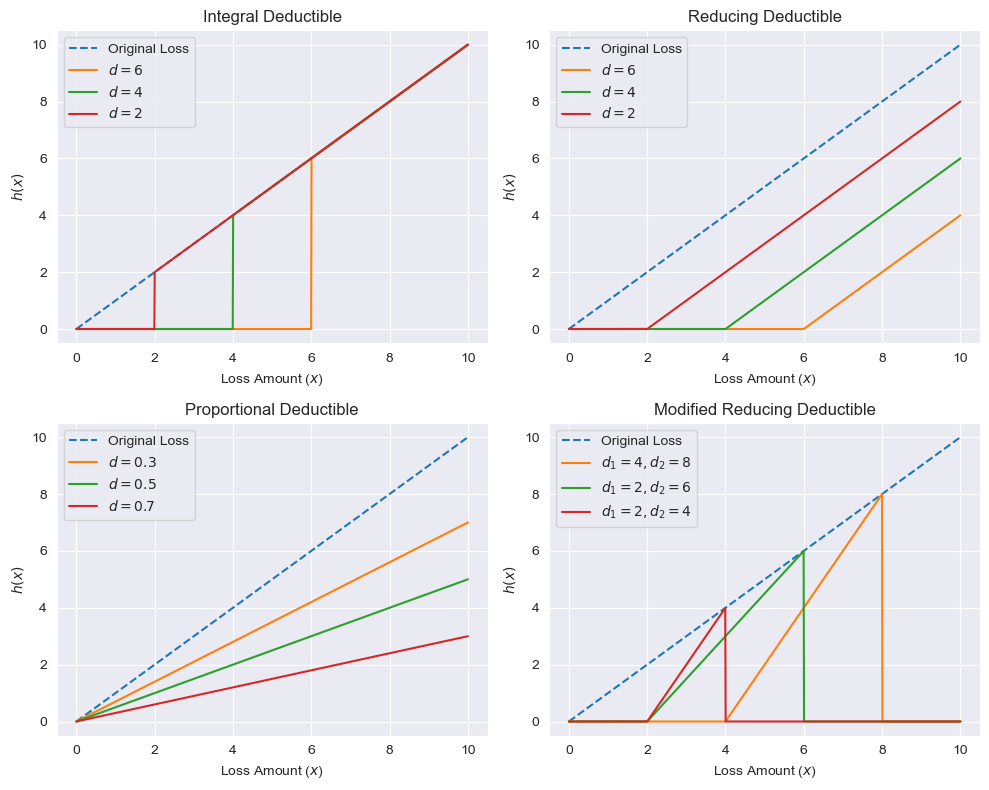

In [209]:
x = np.linspace(0, 10, 1000)
    
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 2, figure=fig)

# Plot 1: Integral Deductible
ax1 = fig.add_subplot(gs[0, 0])
ds = (6, 4, 2)
ax1.plot(x, x, label='Original Loss', linestyle='--')
for d in ds:
    ax1.plot(x, integral_deductible(x, d), label=f'$d = {d}$')    
ax1.set_title('Integral Deductible')
ax1.set_xlabel('Loss Amount ($x$)')
ax1.set_ylabel('$h(x)$')
ax1.legend()

# Plot 2: Reducing Deductible
ax1 = fig.add_subplot(gs[0, 1])
ds = (6, 4, 2)
ax1.plot(x, x, label='Original Loss', linestyle='--')
for d in ds:
    ax1.plot(x, reducing_deductible(x, d), label=f'$d = {d}$')    
ax1.set_title('Reducing Deductible')
ax1.set_xlabel('Loss Amount ($x$)')
ax1.set_ylabel('$h(x)$')
ax1.legend()

# Plot 3: Proportional Deductible
ax1 = fig.add_subplot(gs[1, 0])
ds = (0.3, 0.5, 0.7)  
ax1.plot(x, x, label='Original Loss', linestyle='--')
for d in ds:
    ax1.plot(x, proportional_deductible(x, d), label=f'$d = {d}$')    
ax1.set_title('Proportional Deductible')
ax1.set_xlabel('Loss Amount ($x$)')
ax1.set_ylabel('$h(x)$')
ax1.legend()

# Plot 4: Modified Reducing Deductible
ax1 = fig.add_subplot(gs[1, 1])
ds = ((4, 8), (2, 6), (2, 4)) 
ax1.plot(x, x, label='Original Loss', linestyle='--')
for d1, d2 in ds:
    ax1.plot(x, modified_reducing_deductible(x, d1, d2), label=f'$d_1 = {d1}, d_2 = {d2}$')    
ax1.set_title('Modified Reducing Deductible')
ax1.set_xlabel('Loss Amount ($x$)')
ax1.set_ylabel('$h(x)$')
ax1.legend()

plt.tight_layout()
plt.show()
# plt.savefig("Task2_deductibles.svg")

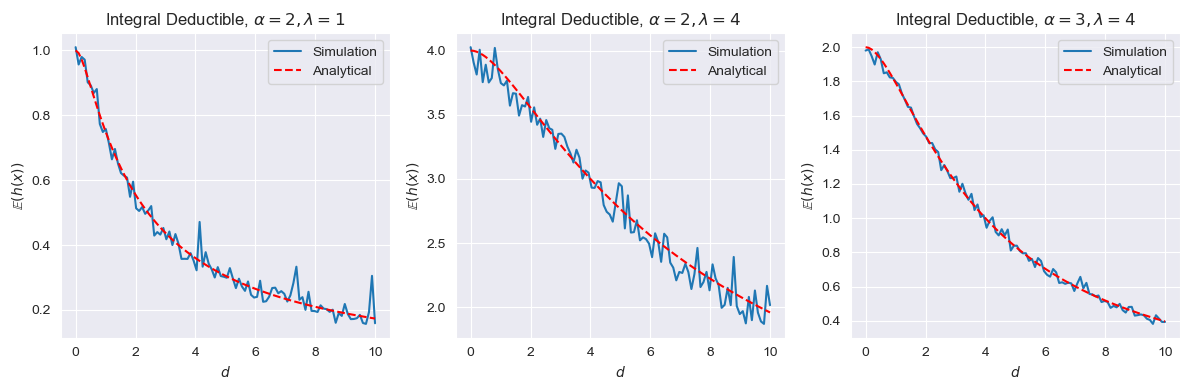

In [ ]:
ds = np.linspace(0, 10, 100)
params = ((2, 1), (2, 4), (3, 4))
    
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(1, 3, figure=fig)

for i, (alpha, lambda_) in enumerate(params):
    ax = fig.add_subplot(gs[i])
    ax.plot(ds, [integral_premium_sim(d, alpha, lambda_) for d in ds], label=f'Simulation')   
    ax.plot(ds, [integral_premium(d, alpha, lambda_) for d in ds], label=f'Analytical', linestyle = '--', color = 'red')     
    ax.set_title(f'Integral Deductible, $\\alpha = {alpha}, \\lambda = {lambda_}$')
    ax.set_xlabel('$d$')
    ax.set_ylabel('$\mathbb{E}(h(x))$')
    ax.legend()

plt.tight_layout()
plt.show()
# plt.savefig("Task2_premium_integral.svg")

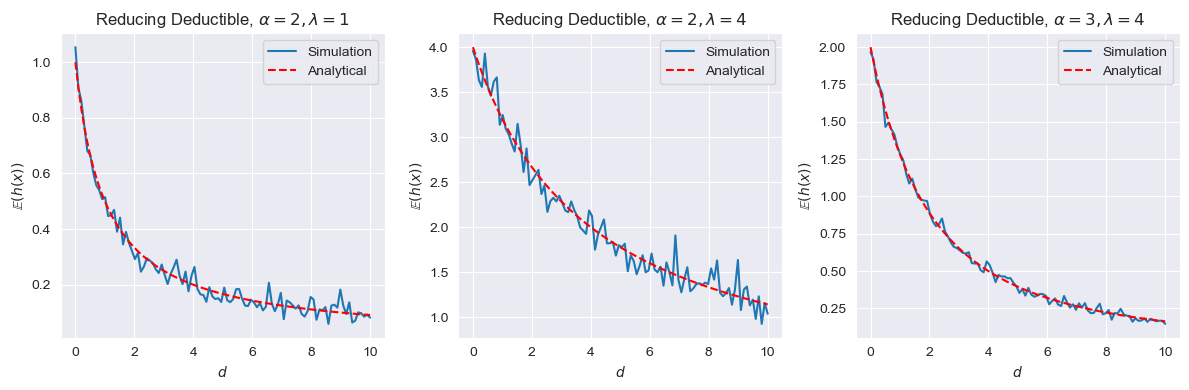

In [ ]:
ds = np.linspace(0, 10, 100)
params = ((2, 1), (2, 4), (3, 4))
    
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(1, 3, figure=fig)

for i, (alpha, lambda_) in enumerate(params):
    ax = fig.add_subplot(gs[i])
    ax.plot(ds, [reducing_premium_sim(d, alpha, lambda_) for d in ds], label=f'Simulation')   
    ax.plot(ds, [reducing_premium(d, alpha, lambda_) for d in ds], label=f'Analytical', linestyle = '--', color = 'red')     
    ax.set_title(f'Reducing Deductible, $\\alpha = {alpha}, \\lambda = {lambda_}$')
    ax.set_xlabel('$d$')
    ax.set_ylabel('$\mathbb{E}(h(x))$')
    ax.legend()

plt.tight_layout()
plt.show()
# plt.savefig("Task2_premium_reducing.svg")

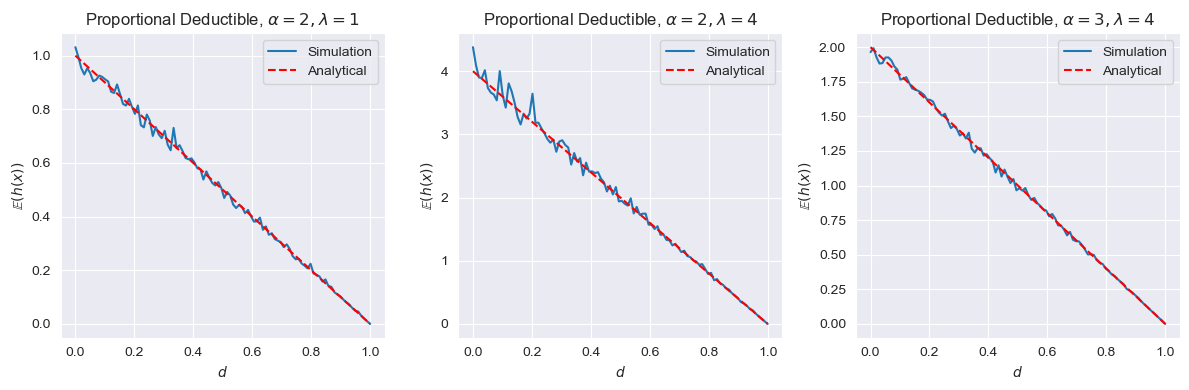

In [ ]:
ds = np.linspace(0, 1, 100)
params = ((2, 1), (2, 4), (3, 4))
    
fig = plt.figure(figsize=(12, 4))
gs = GridSpec(1, 3, figure=fig)

for i, (alpha, lambda_) in enumerate(params):
    ax = fig.add_subplot(gs[i])
    ax.plot(ds, [proportional_premium_sim(d, alpha, lambda_) for d in ds], label=f'Simulation')   
    ax.plot(ds, [proportional_premium(d, alpha, lambda_) for d in ds], label=f'Analytical', linestyle = '--', color = 'red')     
    ax.set_title(f'Proportional Deductible, $\\alpha = {alpha}, \\lambda = {lambda_}$')
    ax.set_xlabel('$d$')
    ax.set_ylabel('$\mathbb{E}(h(x))$')
    ax.legend()

plt.tight_layout()
plt.show()
# plt.savefig("Task2_premium_proportional.svg")

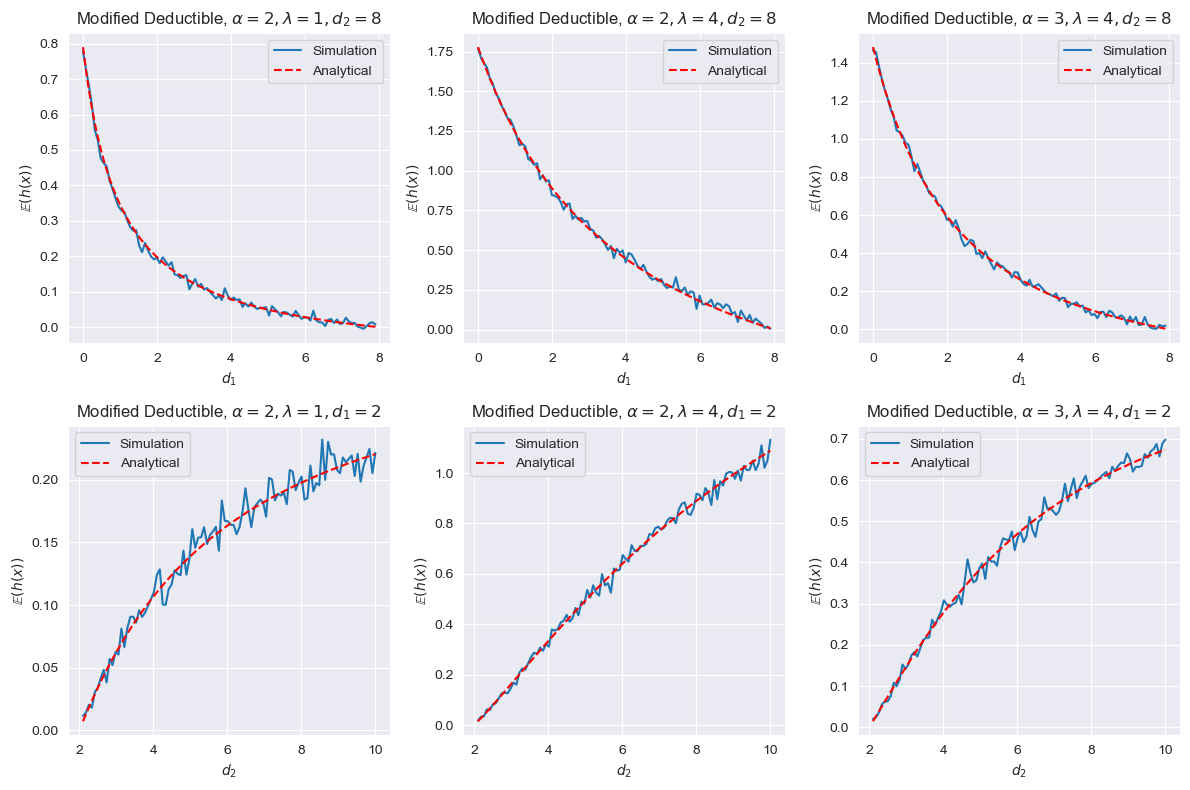

In [229]:
params = ((2, 1), (2, 4), (3, 4))
    
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 3, figure=fig)

for i, (alpha, lambda_) in enumerate(params):
    d2 = 8
    ds = np.linspace(0, 7.9, 100)
    ax = fig.add_subplot(gs[0, i])
    ax.plot(ds, [modified_reducing_premium_sim(d1, d2, alpha, lambda_) for d1 in ds], label=f'Simulation')   
    ax.plot(ds, [modified_reducing_premium(d1, d2, alpha, lambda_) for d1 in ds], label=f'Analytical', linestyle = '--', color = 'red')     
    ax.set_title(f'Modified Deductible, $\\alpha = {alpha}, \\lambda = {lambda_}, d_2 = {d2}$')
    ax.set_xlabel('$d_1$')
    ax.set_ylabel('$\mathbb{E}(h(x))$')
    ax.legend()

for i, (alpha, lambda_) in enumerate(params):
    d1 = 2
    ds = np.linspace(2.1, 10, 100)
    ax = fig.add_subplot(gs[1, i])
    ax.plot(ds, [modified_reducing_premium_sim(d1, d2, alpha, lambda_) for d2 in ds], label=f'Simulation')   
    ax.plot(ds, [modified_reducing_premium(d1, d2, alpha, lambda_) for d2 in ds], label=f'Analytical', linestyle = '--', color = 'red')     
    ax.set_title(f'Modified Deductible, $\\alpha = {alpha}, \\lambda = {lambda_}, d_1 = {d1}$')
    ax.set_xlabel('$d_2$')
    ax.set_ylabel('$\mathbb{E}(h(x))$')
    ax.legend()

plt.tight_layout()
plt.show()
# plt.savefig("Task2_premium_modified.svg")